In [10]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [11]:
import kwant

In [34]:
L, W = 5, 3
a = 0.5
t = 1

In [40]:
def shape(pos):
    (x, y) = pos
    return (0 < x < L and 0 < y < W)

lat = kwant.lattice.square(a)
sys = kwant.Builder()


def onsite(site):
    x = site.pos[0]
    x = np.cos(x)
    return x

sys[lat.shape(shape, (a, a))] = onsite
sys[kwant.HoppingKind((1, 0), lat)] = -t
sys[kwant.HoppingKind((0, 1), lat)] = -t

(0, 3)

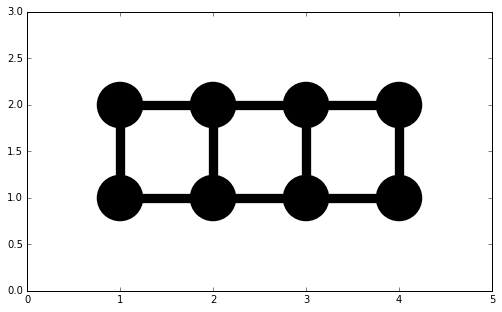

In [24]:
fig = kwant.plot(sys, show=False, fig_size=(10,5))
ax = fig.get_axes()[0]
ax.set_xlim(0,L)
ax.set_ylim(0,W)

In [6]:
sys = sys.finalized()

In [7]:
sys.hamiltonian_submatrix()

array([[-0.21079580+0.j,  0.00000000+0.j,  0.00000000+0.j, ...,
         0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j,  0.07073720+0.j,  0.00000000+0.j, ...,
         0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j,  0.00000000+0.j,  0.87758256+0.j, ...,
         0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j],
       ..., 
       [ 0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j, ...,
        -0.80114362+0.j,  0.00000000+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j, ...,
         0.00000000+0.j, -0.65364362+0.j,  0.00000000+0.j],
       [ 0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j, ...,
         0.00000000+0.j,  0.00000000+0.j, -0.98999250+0.j]])

In [8]:
onsites = sys.hamiltonian_submatrix().diagonal()
onsites = np.real(onsites)

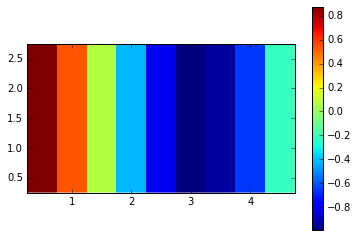

In [9]:
kwant.plotter.map(sys, onsites);